# Background

This notebook is a worksheet used to perform different actions and steps required in the scope of home assignment for solar_243090.csv data set.

#### Setup environment for this notebook

In [2808]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

from sklearn.metrics import mean_absolute_percentage_error

fig_size = figsize = (10, 6)
modified_column_name = "modified1"

# Data cleaning

## Reading the data

In [2809]:
raw_data = pd.read_csv("data/solar_243090.csv", delimiter=",", decimal=".")
source_data = raw_data.copy()
raw_data.describe()

,timestamp,raw,temperature,modified1,modified2,modified3
count,1.701600e+04,17016.000000,17016.000000,15825.000000,15641.000000,15879.000000
mean,1.643547e+12,36912.094888,6.609191,36893.694751,25506.277558,33958.829309
std,1.797037e+10,66907.410347,9.292033,66820.093877,50828.415005,65118.934709
min,1.612224e+12,0.000000,-24.500000,0.000000,0.000000,0.000000
25%,1.628056e+12,0.000000,-0.200000,0.000000,0.000000,0.000000
50%,1.643715e+12,0.000000,6.400000,0.000000,0.000000,0.000000
75%,1.659028e+12,38258.015000,13.400000,38310.320000,22090.490000,30661.975000
max,1.675292e+12,301630.010000,30.100000,301630.010000,266069.210000,301630.010000


First of all, normalize timestamps to human-readable one 

In [2810]:
raw_data["timestamp"] = pd.to_datetime(raw_data["timestamp"], unit="ms", dayfirst=True)

raw_data["hour"] = raw_data["timestamp"].dt.hour
raw_data["month"] = raw_data["timestamp"].dt.month
raw_data["day"] = raw_data["timestamp"].dt.day
raw_data["year"] = raw_data["timestamp"].dt.year


raw_data.set_index("timestamp", inplace=True)
raw_data.describe()

,raw,temperature,modified1,modified2,modified3,hour,month,day,year
count,17016.000000,17016.000000,15825.000000,15641.000000,15879.000000,17016.00000,17016.000000,17016.000000,17016.000000
mean,36912.094888,6.609191,36893.694751,25506.277558,33958.829309,11.50000,6.598025,16.063470,2021.574048
std,66907.410347,9.292033,66820.093877,50828.415005,65118.934709,6.92239,3.410537,8.669555,0.551156
min,0.000000,-24.500000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,2021.000000
25%,0.000000,-0.200000,0.000000,0.000000,0.000000,5.75000,4.000000,9.000000,2021.000000
50%,0.000000,6.400000,0.000000,0.000000,0.000000,11.50000,7.000000,16.000000,2022.000000
75%,38258.015000,13.400000,38310.320000,22090.490000,30661.975000,17.25000,10.000000,24.000000,2022.000000
max,301630.010000,30.100000,301630.010000,266069.210000,301630.010000,23.00000,12.000000,31.000000,2023.000000


In [2811]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17016 entries, 2021-02-02 00:00:00 to 2023-02-01 23:00:00
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raw          17016 non-null  float64
 1   temperature  17016 non-null  float64
 2   modified1    15825 non-null  float64
 3   modified2    15641 non-null  float64
 4   modified3    15879 non-null  float64
 5   hour         17016 non-null  int32  
 6   month        17016 non-null  int32  
 7   day          17016 non-null  int32  
 8   year         17016 non-null  int32  
dtypes: float64(5), int32(4)
memory usage: 1.0 MB


### Analysis of timestamp, raw production, temperature and modified columns data

In [2812]:
year_min = raw_data["year"].min()
year_max = raw_data["year"].max()

temp_min = raw_data["temperature"].min()
temp_max = raw_data["temperature"].max()

print(f"Year min: {year_min}, Year max: {year_max}")
print(f"Temperature min: {temp_min}, Temperature max: {temp_max}")

Year min: 2021, Year max: 2023
Temperature min: -24.5, Temperature max: 30.1


## Detect outliers if any

<Axes: ylabel='raw'>

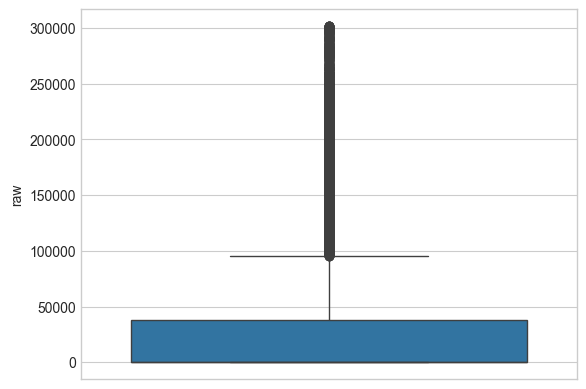

In [2813]:
sbn.boxplot(raw_data['raw'])

### Cleaning the data

In [2814]:
missing = raw_data.isnull().sum()
print(missing)

raw               0
temperature       0
modified1      1191
modified2      1375
modified3      1137
hour              0
month             0
day               0
year              0
dtype: int64


Use raw data to fill modified1 column

In [2815]:
cleaned_data = raw_data.copy()
cleaned_data[modified_column_name] = cleaned_data["raw"].fillna(cleaned_data["raw"])
validation_results = {}
for col in [modified_column_name]:
    matches_raw = (cleaned_data[col] == cleaned_data["raw"]).mean() * 100
    validation_results[col] = f"{matches_raw:.2f}% match"

for col, result in validation_results.items():
    print(f"{col}: {result}")

modified1: 100.00% match


### Performing data removal 

In [2816]:
dataset_with_removed_rows = raw_data.dropna()
dataset_with_removed_rows.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13692 entries, 2021-02-02 00:00:00 to 2023-02-01 23:00:00
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raw          13692 non-null  float64
 1   temperature  13692 non-null  float64
 2   modified1    13692 non-null  float64
 3   modified2    13692 non-null  float64
 4   modified3    13692 non-null  float64
 5   hour         13692 non-null  int32  
 6   month        13692 non-null  int32  
 7   day          13692 non-null  int32  
 8   year         13692 non-null  int32  
dtypes: float64(5), int32(4)
memory usage: 855.8 KB


### Performing data imputation

#### Univariate 

In [2817]:
univariate_dataset = raw_data.copy()
for column in [modified_column_name]:
    univariate_dataset[f"{column}_const"] = univariate_dataset[column].fillna(0)

univariate_dataset.tail(10)

,raw,temperature,modified1,modified2,modified3,hour,month,day,year,modified1_const
timestamp,,,,,,,,,,
2023-02-01 14:00:00,550.23,-1.5,550.23,550.23,550.23,14,2,1,2023,550.23
2023-02-01 15:00:00,0.00,-1.3,0.00,0.00,0.00,15,2,1,2023,0.00
2023-02-01 16:00:00,0.00,-0.9,NaN,0.00,0.00,16,2,1,2023,0.00
2023-02-01 17:00:00,0.00,-0.6,0.00,0.00,0.00,17,2,1,2023,0.00
2023-02-01 18:00:00,0.00,-0.3,0.00,0.00,0.00,18,2,1,2023,0.00
2023-02-01 19:00:00,0.00,0.0,0.00,0.00,0.00,19,2,1,2023,0.00
2023-02-01 20:00:00,0.00,0.1,NaN,0.00,0.00,20,2,1,2023,0.00
2023-02-01 21:00:00,0.00,0.1,NaN,0.00,0.00,21,2,1,2023,0.00
2023-02-01 22:00:00,0.00,0.2,0.00,0.00,0.00,22,2,1,2023,0.00


In [2818]:
univariate_dataset_2 = raw_data.copy()
for column in [modified_column_name]:
    univariate_dataset_2[f"{column}_mean"] = univariate_dataset_2[column].fillna(
        univariate_dataset_2[column].mean()
    )

univariate_dataset_2.tail(10)

,raw,temperature,modified1,modified2,modified3,hour,month,day,year,modified1_mean
timestamp,,,,,,,,,,
2023-02-01 14:00:00,550.23,-1.5,550.23,550.23,550.23,14,2,1,2023,550.230000
2023-02-01 15:00:00,0.00,-1.3,0.00,0.00,0.00,15,2,1,2023,0.000000
2023-02-01 16:00:00,0.00,-0.9,NaN,0.00,0.00,16,2,1,2023,36893.694751
2023-02-01 17:00:00,0.00,-0.6,0.00,0.00,0.00,17,2,1,2023,0.000000
2023-02-01 18:00:00,0.00,-0.3,0.00,0.00,0.00,18,2,1,2023,0.000000
2023-02-01 19:00:00,0.00,0.0,0.00,0.00,0.00,19,2,1,2023,0.000000
2023-02-01 20:00:00,0.00,0.1,NaN,0.00,0.00,20,2,1,2023,36893.694751
2023-02-01 21:00:00,0.00,0.1,NaN,0.00,0.00,21,2,1,2023,36893.694751
2023-02-01 22:00:00,0.00,0.2,0.00,0.00,0.00,22,2,1,2023,0.000000


In [2819]:
univariate_linear = raw_data.copy()
for column in ["modified1"]:
    univariate_linear[f"{column}_li"] = univariate_linear[column].interpolate(
        method="linear", forward=True
    )

univariate_linear.tail(10)

,raw,temperature,modified1,modified2,modified3,hour,month,day,year,modified1_li
timestamp,,,,,,,,,,
2023-02-01 14:00:00,550.23,-1.5,550.23,550.23,550.23,14,2,1,2023,550.23
2023-02-01 15:00:00,0.00,-1.3,0.00,0.00,0.00,15,2,1,2023,0.00
2023-02-01 16:00:00,0.00,-0.9,NaN,0.00,0.00,16,2,1,2023,0.00
2023-02-01 17:00:00,0.00,-0.6,0.00,0.00,0.00,17,2,1,2023,0.00
2023-02-01 18:00:00,0.00,-0.3,0.00,0.00,0.00,18,2,1,2023,0.00
2023-02-01 19:00:00,0.00,0.0,0.00,0.00,0.00,19,2,1,2023,0.00
2023-02-01 20:00:00,0.00,0.1,NaN,0.00,0.00,20,2,1,2023,0.00
2023-02-01 21:00:00,0.00,0.1,NaN,0.00,0.00,21,2,1,2023,0.00
2023-02-01 22:00:00,0.00,0.2,0.00,0.00,0.00,22,2,1,2023,0.00


#### Multivariate (MICE)

In [2820]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

multivariate_dataset = raw_data.copy()
missing_mask = multivariate_dataset.isna()
missing_mask.describe()

feature_columns = ["raw", "temperature"]

columns = multivariate_dataset[[modified_column_name] + feature_columns]
imputed_data = imputer.fit_transform(columns)

print(imputed_data)

multivariate_dataset["modified1_imputed"] = imputed_data[:, 0]

multivariate_dataset.tail(10)

[[ 0.   0.  -3.9]
 [ 0.   0.  -3.5]
 [ 0.   0.  -3. ]
 ...
 [ 0.   0.   0.1]
 [ 0.   0.   0.2]
 [ 0.   0.   0.2]]


,raw,temperature,modified1,modified2,modified3,hour,month,day,year,modified1_imputed
timestamp,,,,,,,,,,
2023-02-01 14:00:00,550.23,-1.5,550.23,550.23,550.23,14,2,1,2023,550.23
2023-02-01 15:00:00,0.00,-1.3,0.00,0.00,0.00,15,2,1,2023,0.00
2023-02-01 16:00:00,0.00,-0.9,NaN,0.00,0.00,16,2,1,2023,0.00
2023-02-01 17:00:00,0.00,-0.6,0.00,0.00,0.00,17,2,1,2023,0.00
2023-02-01 18:00:00,0.00,-0.3,0.00,0.00,0.00,18,2,1,2023,0.00
2023-02-01 19:00:00,0.00,0.0,0.00,0.00,0.00,19,2,1,2023,0.00
2023-02-01 20:00:00,0.00,0.1,NaN,0.00,0.00,20,2,1,2023,0.00
2023-02-01 21:00:00,0.00,0.1,NaN,0.00,0.00,21,2,1,2023,0.00
2023-02-01 22:00:00,0.00,0.2,0.00,0.00,0.00,22,2,1,2023,0.00


### Comparison of cleaned data vs baseline

In [2821]:
#### Standard errors

In [2822]:
rmse = root_mean_squared_error(
    raw_data["raw"], multivariate_dataset["modified1_imputed"]
)
mae = mean_absolute_error(raw_data["raw"], multivariate_dataset["modified1_imputed"])

items = len(raw_data["raw"])
residuals = raw_data["raw"] - multivariate_dataset["modified1_imputed"]
std_error = np.std(residuals) / np.sqrt(items)

std_error_for_raw = raw_data.sem()
std_error_for_modified1_imputed = multivariate_dataset.sem()
univariate_linear_modified1_linear = univariate_linear.sem()

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(
    f"std_error_for_modified1_imputed: {std_error_for_modified1_imputed['modified1_imputed']}"
)
print(f"std_error_for_raw: {std_error_for_raw['raw']}")
print(
    f"std_error_for_univariate_linear: {univariate_linear_modified1_linear['modified1_li']}"
)

RMSE: 8.376418709953482
MAE: 0.7418968421877531
std_error_for_modified1_imputed: 512.9170027851162
std_error_for_raw: 512.9150972643843
std_error_for_univariate_linear: 510.70582251323435


# Data exploration and feature engineering

## Working with raw data

Text(0, 0.5, 'Production')

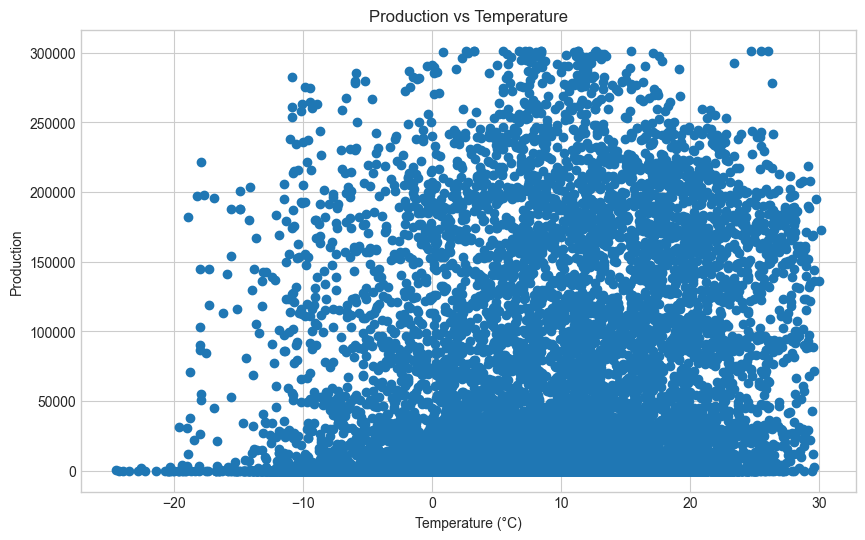

In [2823]:
plt.figure(figsize=fig_size)
plt.scatter(raw_data["temperature"], raw_data["raw"])
plt.title("Production vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Production")

### Production distribution in time-series chart

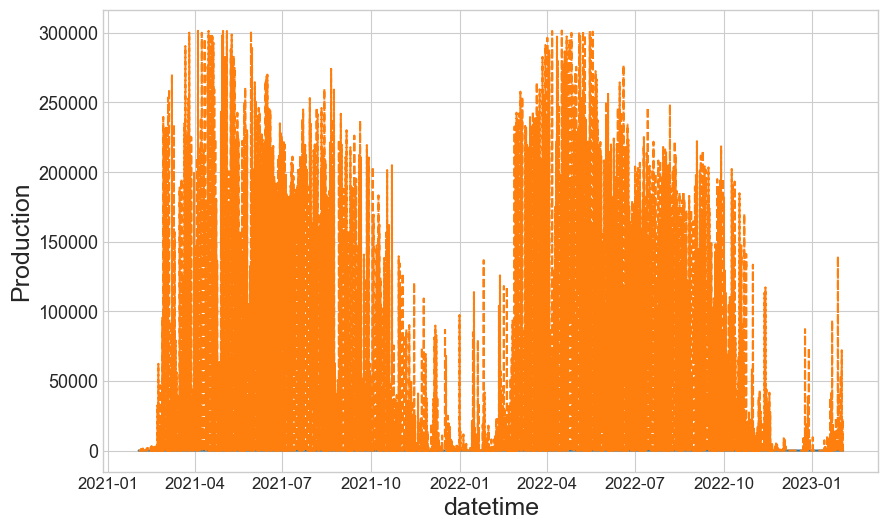

In [2824]:
consumption = raw_data["temperature"], raw_data["raw"]

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=fig_size)
p = sbn.lineplot(data=consumption)
p.set_ylabel("Production", fontsize=18)
p.set_xlabel("datetime", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)
plt.legend("", frameon=False)

### Lagged feature

In [2825]:
raw_data["raw_lag1h"] = raw_data["raw"].shift(1)
raw_data["temperature_lag1h"] = raw_data["temperature"].shift(1)

raw_data["raw_rolling_3h"] = raw_data["raw"].rolling(window=3).mean()
raw_data["raw_rolling_std_3h"] = raw_data["raw"].rolling(window=3).std()

engineered_features = [
    "raw",
    "temperature",
    "raw_lag1h",
    "temperature_lag1h",
    "raw_rolling_3h",
    "raw_rolling_std_3h",
]
print(raw_data[engineered_features].describe())

                 raw   temperature      raw_lag1h  temperature_lag1h  \
count   17016.000000  17016.000000   17015.000000       17015.000000   
mean    36912.094888      6.609191   36914.264273           6.609568   
std     66907.410347      9.292033   66908.778095           9.292176   
min         0.000000    -24.500000       0.000000         -24.500000   
25%         0.000000     -0.200000       0.000000          -0.200000   
50%         0.000000      6.400000       0.000000           6.400000   
75%     38258.015000     13.400000   38265.710000          13.400000   
max    301630.010000     30.100000  301630.010000          30.100000   

       raw_rolling_3h  raw_rolling_std_3h  
count    17014.000000        17014.000000  
mean     36916.433914        12531.049620  
std      64095.940092        19899.263778  
min          0.000000            0.000000  
25%          0.000000            0.000000  
50%        837.208333         1028.584146  
75%      44600.933333        17421.503700  

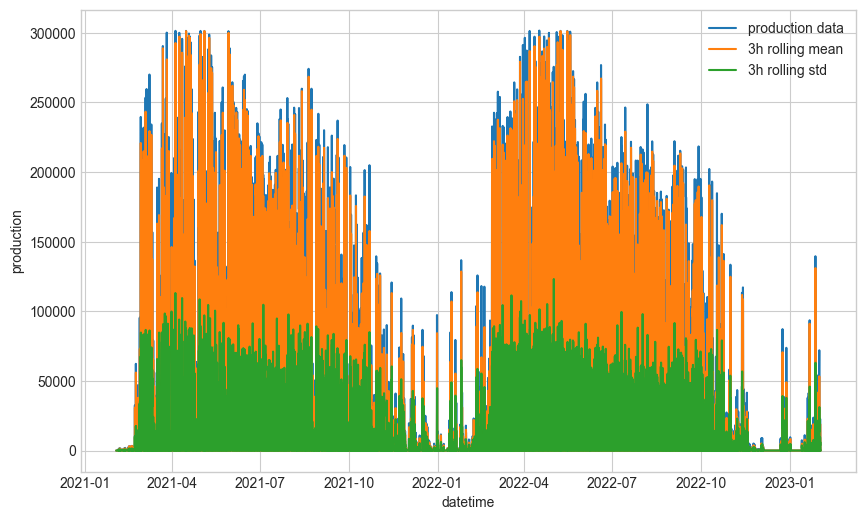

In [2826]:
plt.figure(figsize=(fig_size))
plt.plot(raw_data["raw"], label="production data")
plt.plot(
    raw_data["raw_rolling_3h"],
    label="3h rolling mean",
)
plt.plot(
    raw_data["raw_rolling_std_3h"],
    label="3h rolling std",
)
plt.xlabel("datetime")
plt.ylabel("production")
plt.legend()
plt.grid(True)

In [2827]:
### Is it normally distributed? lets check

Text(0.5, 1.0, 'Probability plot to prove if the data is normally distributed')

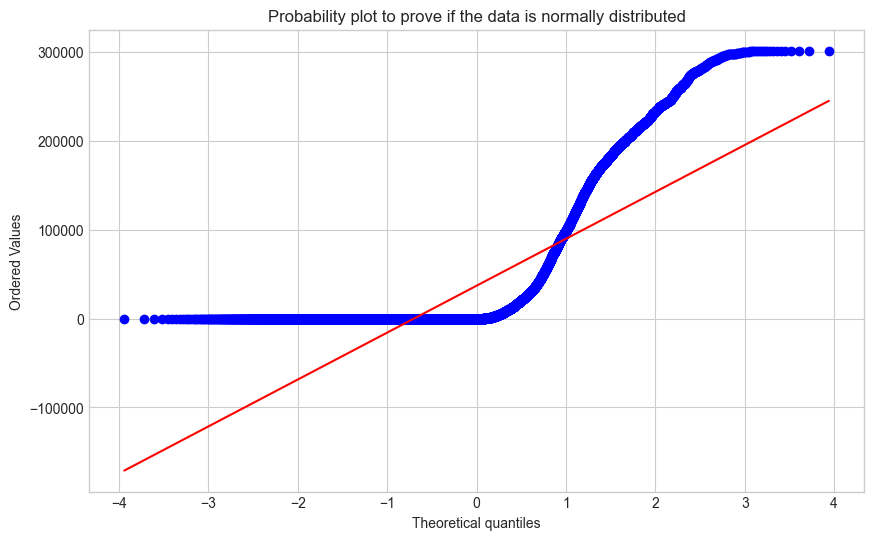

In [2828]:
import scipy.stats as stats

plt.figure(figsize=fig_size)
stats.probplot(raw_data["raw"].dropna(), dist="norm", plot=plt)
plt.title("Probability plot to prove if the data is normally distributed")

### Data normalization 

Text(0.5, 1.0, 'Scaled production data')

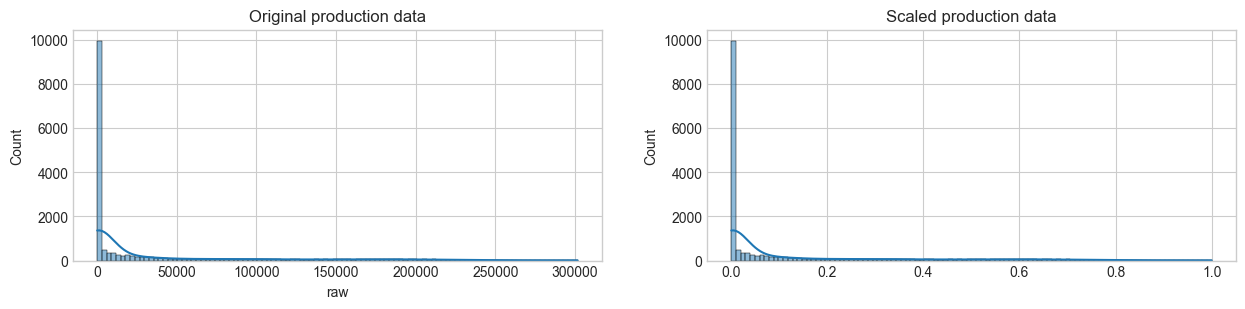

In [2829]:
from sklearn.preprocessing import minmax_scale

scaled_data = minmax_scale(raw_data["raw"])

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sbn.histplot(raw_data["raw"], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original production data")
sbn.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled production data")

Text(0.5, 1.0, 'Scaled temp data')

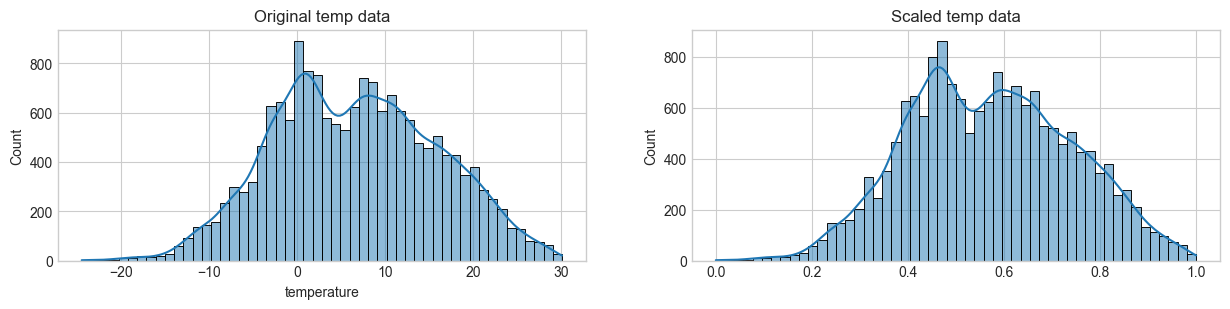

In [2830]:
scaled_data_temp = minmax_scale(raw_data["temperature"])

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sbn.histplot(raw_data["temperature"], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original temp data")
sbn.histplot(scaled_data_temp, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled temp data")

# Data analysis

## Time-series approach

In [2831]:
# trend = raw_data.rolling(window="period", center=True, min_periods=1).mean()

## Generation profiles

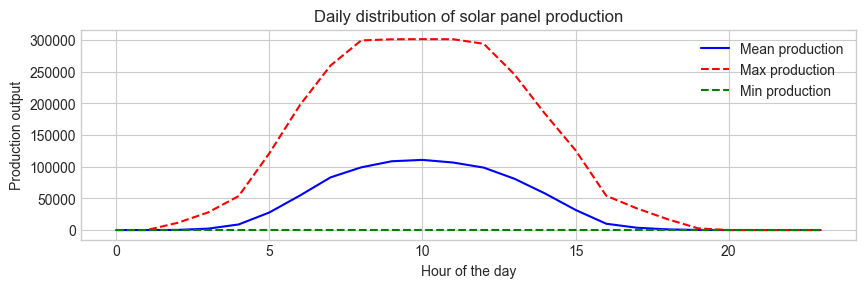

In [2832]:
hourly_series = (
    raw_data.groupby("hour")["raw"]
    .agg(
        [
            "mean",
            "std",
            "min",
            "max",
        ]
    )
    .round(2)
)

fig = plt.figure(figsize=fig_size)

plt.subplot(2, 1, 1)  # extend the chart a bit and flatten it

plt.plot(hourly_series.index, hourly_series["mean"], "b-", label="Mean production")
plt.plot(hourly_series.index, hourly_series["max"], "r--", label="Max production")
plt.plot(hourly_series.index, hourly_series["min"], "g--", label="Min production")

plt.title("Daily distribution of solar panel production")
plt.xlabel("Hour of the day")
plt.ylabel("Production output")
plt.grid(True)
plt.legend()

### Peak hours production

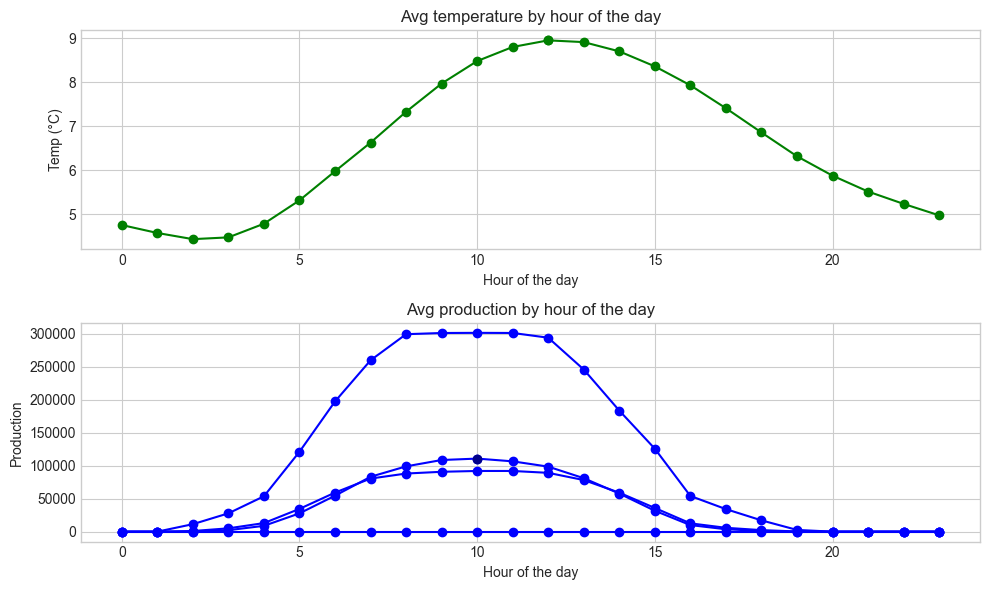

In [2833]:
hourly_series_temp = (
    raw_data.groupby("hour")["temperature"]
    .agg(
        [
            "mean",
            "std",
            "min",
            "max",
        ]
    )
    .round(2)
)

peak_temp_hourly = hourly_series_temp["mean"].idxmax()
peak_temp = hourly_series_temp.loc[peak_temp_hourly, "mean"]

peak_prod_hourly = hourly_series["mean"].idxmax()
peak_production = hourly_series.loc[peak_prod_hourly, "mean"]

plt.figure(figsize=fig_size)

plt.subplot(2, 1, 1)
plt.plot(
    hourly_series_temp.index,
    hourly_series_temp["mean"],
    color="green",
    marker="o",
    label="Temp (°C)",
)
plt.title("Avg temperature by hour of the day")
plt.ylabel("Temp (°C)")
plt.xlabel("Hour of the day")
plt.grid(True, axis="y")

plt.scatter(peak_temp_hourly, peak_temp, color="green", label="Peak temp")

plt.subplot(2, 1, 2)
plt.plot(
    hourly_series.index,
    hourly_series,
    color="blue",
    marker="o",
    label="Production",
)
plt.title("Avg production by hour of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Production")
plt.grid(True, axis="y")

plt.scatter(
    peak_prod_hourly,
    peak_production,
    color="darkblue",
    label="Peak Production",
    zorder=5,
)

plt.tight_layout()

### Lowest performance

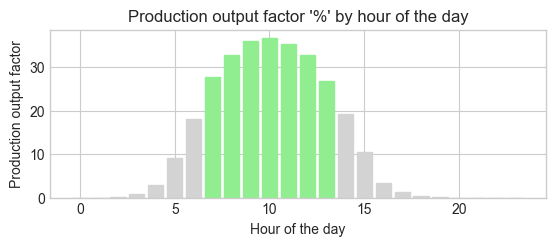

In [2834]:
max_possible_production_output = raw_data["raw"].max()
hourly_series["output_factor"] = (
    hourly_series["mean"] / max_possible_production_output * 100
).round(2)

hourly_series["period"] = pd.cut(
    hourly_series["mean"],
    bins=[
        -np.inf,
        max_possible_production_output * 0.2,
        np.inf,
    ],
    labels=["no", "lowest (20%)"],
)

plt.subplot(2, 1, 2)
bars = plt.bar(hourly_series.index, hourly_series["output_factor"])

colors = {
    "no": "lightgray",
    "lowest (20%)": "lightgreen",
}

for bar, period in zip(bars, hourly_series["period"]):
    bar.set_color(colors[period])

plt.title("Production output factor '%' by hour of the day")
plt.xlabel("Hour of the day")
plt.ylabel("Production output factor")
plt.grid(True, axis="y")